In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

In [4]:
le=LabelEncoder()
df = pd.read_csv('C:\\Users\goyal\Datasets\Iris.csv')
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df['label']=le.fit_transform(df['Species'])
df=df.drop('Species',1)
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,label
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,2
146,147,6.3,2.5,5.0,1.9,2
147,148,6.5,3.0,5.2,2.0,2
148,149,6.2,3.4,5.4,2.3,2


In [6]:
df=df.drop(['Id'],1)

In [7]:
X = df[['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm']]
Y = df.drop(['SepalLengthCm', 'SepalWidthCm','PetalLengthCm','PetalWidthCm'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=5)
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train, y_train)
pred=knn.predict(X_test)
print('Accuracy=',knn.score(X_test,y_test))
fullpred=knn.predict(X)

Accuracy= 1.0


C:\Users\goyal\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


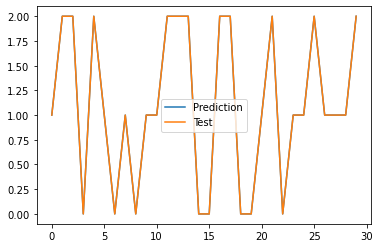

In [11]:
plt.plot(pred,label='Prediction')
plt.plot(y_test.values,label='Test')
plt.legend()

In [12]:
from sklearn.linear_model import LinearRegression

Hlimit=1.5
Llimit=.5

model=LinearRegression()
model.fit(X_train,y_train)
pred=model.predict(X_test)
for i in range(len(pred)):
    if(pred[i]<Llimit):
        pred[i]=0
    if(pred[i]>Hlimit):
        pred[i]=2
    else:
        pred[i]=1
model.score(X_test,y_test)

0.8844305895062621

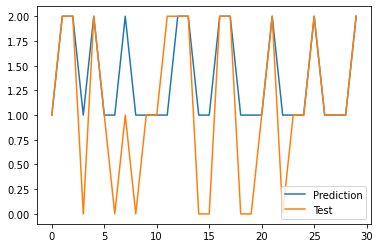

In [13]:
plt.plot(pred,label='Prediction')
plt.plot(y_test.values,label='Test')
plt.legend()